In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

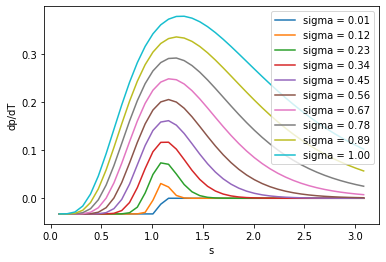

<ipython-input-51-c475dc6b8510>:2: RuntimeWarning: invalid value encountered in log
  return ((r + sigma**2 / 2) * (T - t) + np.log(s / K)) / (sigma * np.sqrt(T - t))
<ipython-input-51-c475dc6b8510>:5: RuntimeWarning: invalid value encountered in log
  return ((r - sigma**2 / 2) * (T - t) + np.log(s / K)) / (sigma * np.sqrt(T - t))
<ipython-input-51-c475dc6b8510>:2: RuntimeWarning: invalid value encountered in log
  return ((r + sigma**2 / 2) * (T - t) + np.log(s / K)) / (sigma * np.sqrt(T - t))
<ipython-input-51-c475dc6b8510>:5: RuntimeWarning: invalid value encountered in log
  return ((r - sigma**2 / 2) * (T - t) + np.log(s / K)) / (sigma * np.sqrt(T - t))


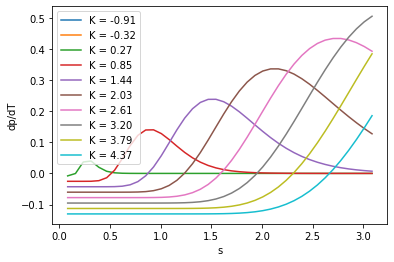

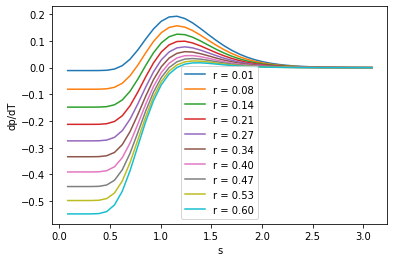

In [51]:
def d_plus(s, sigma, T, t, r, K):
  return ((r + sigma**2 / 2) * (T - t) + np.log(s / K)) / (sigma * np.sqrt(T - t))

def d_minus(s, sigma, T, t, r, K):
  return ((r - sigma**2 / 2) * (T - t) + np.log(s / K)) / (sigma * np.sqrt(T - t))
  
def theta_put_option(t, s, r, sigma, T, K):
  return (s * sigma * np.exp(-d_plus(s, sigma, T, t, r, K)**2 / 2)
          / (2 * np.sqrt(2 * np.pi * (T - t))) 
          - K * r * np.exp(- r * (T - t)) * norm.cdf(- d_minus(s, sigma, T, t, r, K)))
  
def estimate_sigma(s_values, t, r, T, K):
  sigma_values = np.linspace(0.01, 1, 10)
  theta_put_option_values = []

  for sigma in sigma_values:
    theta_put_option_values = []
    for s in s_values:
      theta_put_option_values.append(theta_put_option(t, s, r, sigma, T, K))
    plt.plot(s_values, theta_put_option_values, label = f"sigma = {sigma:.2f}")

  plt.legend() 
  plt.xlabel("s")
  plt.ylabel("dp/dT")
  plt.show()

def estimate_K(s_values, t, r, sigma, T):
  K_values = np.linspace(s_values[0] * np.exp(r * T) - 1, s_values[-1] * np.exp(r * T) + 1, 10)
  theta_put_option_values = []

  for K in K_values:
    theta_put_option_values = []
    for s in s_values:
      theta_put_option_values.append(theta_put_option(t, s, r, sigma, T, K))
    plt.plot(s_values, theta_put_option_values, label = f"K = {K:.2f}")

  plt.xlabel("s")
  plt.ylabel("dp/dT")
  plt.legend()
  plt.show()

def estimate_r(s_values, t, sigma, T, k):
  r_values = np.linspace(0.01, 0.6, 10)
  theta_put_option_values = []

  for r in r_values:
    theta_put_option_values = []
    for s in s_values:
      theta_put_option_values.append(theta_put_option(t, s, r, sigma, T, K))
    plt.plot(s_values, theta_put_option_values, label = f"r = {r:.2f}")

  plt.legend() 
  plt.xlabel("s")
  plt.ylabel("dp/dT")
  plt.show()

N = 1000
s0 = 1
r = 0.03
sigma = 0.5
T = 3
t = 0.9*T
K = s0 * np.exp(r * T)

s_values = np.linspace(K * np.exp(- r * (T - t)) - 1, K * np.exp(- r * (T - t)) + 2, 40)

estimate_sigma(s_values, t, r, T, K)
estimate_K(s_values, t, r, sigma, T) 
estimate_r(s_values, t, sigma, T, K)

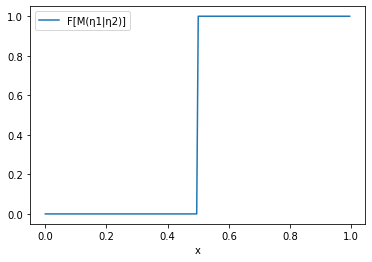

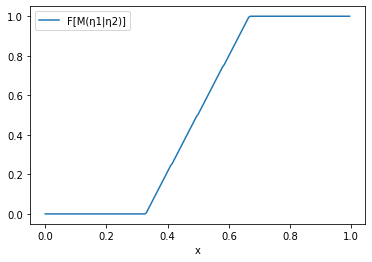

In [50]:
def copula_1(x, y):
  return x * y

def copula_2(x, y, p):
  return p * max(x + y - 1, 0) + (1 - p) * min(x, y)
    
def distribution_function(copula, *kwargs):
  N = 200
  x_values = np.linspace(0, 1, N+1)
  p_a = np.zeros(N)

  for i in range (1, N+1):
    xi = 0
    p = 0
    for j in range (1, N+1):
      p += xi*(
          copula(x_values[i], x_values[j], *kwargs) 
          + copula(x_values[i-1], x_values[j-1], *kwargs) 
          - copula(x_values[i], x_values[j-1], *kwargs) 
          - copula(x_values[i-1], x_values[j], *kwargs)
      )
      xi += 1
    p_a[i-1] = p
    
  distr_data = np.zeros(N)
  for i in range(N):
    appr_data = np.array(p_a < x_values[i])
    distr_data[i] = len(p_a[appr_data])/(N)
    
  plt.plot(x_values[:-1], distr_data, label = "F[M(η1|η2)]")
  plt.legend() 
  plt.xlabel("x")
  plt.show()

distribution_function(copula_1)
distribution_function(copula_2, 0.33)